## RFM Analysis

### RFM stands for Recency, Frequency, and Monetary value.

#### The  idea is to segment customers based on 

1- when their last purchase was

2- how often they’ve purchased in the past

3- and how much they’ve spent overall

All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers

### Import nessecary Libraries 

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [274]:
df=pd.read_csv("online_retail.csv",sep=';')

In [275]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,"6,95",13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,"6,75",13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1.12.2009 07:45,"2,1",13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.12.2009 07:45,"1,25",13085.0,United Kingdom


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  object 
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 64.0+ MB


In [277]:
df.shape

(1048575, 8)

### Convert DataTypes
   1- To DateTime of Invoice Date Column
    

In [278]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])


2- To Float For Price Column

In [279]:
df.replace({'Price': {',': '.'}}, regex=True,inplace=True)

In [280]:
df["Price"]=df["Price"].astype(float)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1048575 non-null  object        
 1   StockCode    1048575 non-null  object        
 2   Description  1044203 non-null  object        
 3   Quantity     1048575 non-null  int64         
 4   InvoiceDate  1048575 non-null  datetime64[ns]
 5   Price        1048575 non-null  float64       
 6   Customer ID  811893 non-null   float64       
 7   Country      1048575 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 64.0+ MB


### Detect Missing Values

In [282]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

<AxesSubplot:>

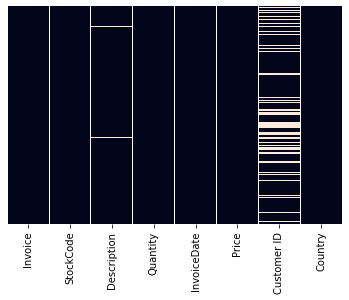

In [283]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### Handling Missing Values

In [284]:
df.dropna(inplace = True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

## Detect Outliers

In [285]:
df.describe()

,Quantity,Price,Customer ID
count,811893.000000,811893.000000,811893.000000
mean,12.422211,3.689914,15324.712265
std,141.686387,70.743669,1697.033034
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13971.000000
50%,5.000000,1.950000,15260.000000
75%,12.000000,3.750000,16795.000000
max,74215.000000,38970.000000,18287.000000


In [286]:
print('skewness value of Quantity: ',df['Quantity'].skew())
print('skewness value of Price: ',df['Price'].skew())

skewness value of Quantity:  12.44822711309925
skewness value of Price:  309.2990004611184


This is easy to check with the skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

### Identify The Issues in Returned Orders

In [287]:
returned = df[df["Invoice"].str.contains("C",na=False)]
returned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-01-12 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-01-12 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-01-12 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-01-12 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-01-12 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1046566,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2011-02-12 15:10:00,4.95,12668.0,Germany
1046567,C580313,22419,LIPSTICK PEN RED,-6,2011-02-12 15:10:00,0.42,12668.0,Germany
1046568,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2011-02-12 15:10:00,2.55,12668.0,Germany
1046569,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2011-02-12 15:10:00,1.25,12668.0,Germany


In [288]:
returned.shape

(18513, 8)

We identify That there are 19261 returned order with negative value in Qunatity Which can make The Outlier on The dataset 

## Visualize Outliers

<AxesSubplot:>

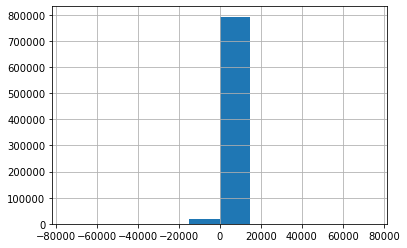

In [289]:
df["Quantity"].hist()


<AxesSubplot:>

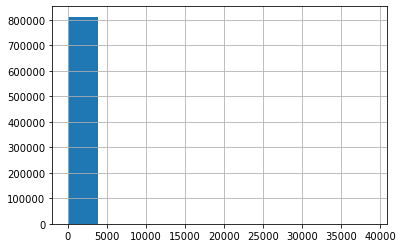

In [290]:
df["Price"].hist()

Drop Returned Inoviced that because i don't need it in My Analysis

In [291]:
df= df[~df["Invoice"].str.contains("C", na = False)]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-04-12 13:00:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-04-12 13:00:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,2011-04-12 13:15:00,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,2011-04-12 13:15:00,2.89,16931.0,United Kingdom


## Handling Outliers

In [292]:
for feature in ["Quantity","Price"]:

    Q1 = df[feature].quantile(0.10)
    Q3 = df[feature].quantile(0.90)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    df[feature]=np.where(df[feature]>upper,upper,np.where(df[feature]<lower,lower,df[feature]))

Check The value os Skewness Again

In [293]:
print('skewness value of Quantity: ',df['Quantity'].skew())
print('skewness value of Price: ',df['Price'].skew())

skewness value of Quantity:  2.4515365479976974
skewness value of Price:  2.1607192670132136


## Add Total Price Column
As that we interested with RFM Scores We need to know The TotalPrice Per each Invoice

In [294]:
df["TotalSum"]=df["Price"]*df["Quantity"]
df["TotalSum"]

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1048570     16.50
1048571     14.85
1048572      4.95
1048573      5.78
1048574      6.65
Name: TotalSum, Length: 793380, dtype: float64

Check if there's any value not make sense in the 3 columns that we intersted in 
total sum- Qunatity- Price

<AxesSubplot:>

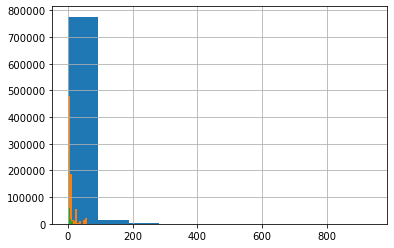

In [295]:
df['TotalSum'].hist()
df['Quantity'].hist()
df['Price'].hist()

Find The Minimum Ans The Maximum Date in Our data set

In [296]:
print('Min:{};Max:{}'.format(min(df.InvoiceDate),max(df.InvoiceDate)))

Min:2009-01-12 07:45:00;Max:2011-12-10 17:19:00


## Add Column Snapshot_date 
because the data range between 2009_2011  and RFM Analysis in Real World will Created at today 

so we will emulate The Real Problem by increase the maximum date by one day

In [297]:
import datetime
snapshot_date=max(df["InvoiceDate"]) + datetime.timedelta(days=1)
snapshot_date

Timestamp('2011-12-11 17:19:00')

As We defined Before

Recency: Will be the days left from last Transaction by customer

Frequency: How often Each Customer purchased in the past

Mondetary: how much Each Customer spent overall

In [298]:
datamart=df.groupby(["Customer ID"]).agg({
    'InvoiceDate':lambda x:(snapshot_date-x.max()).days,
    'Invoice':'count',
    'TotalSum':'sum'})
datamart.head()

,InvoiceDate,Invoice,TotalSum
Customer ID,,,
12346.0,327,34,433.700
12347.0,41,242,5219.740
12348.0,77,51,1299.045
12349.0,20,175,3626.440
12350.0,312,17,310.450


In [299]:
datamart.rename(
         columns={'InvoiceDate':'Recency',
                  'Invoice' :'Frequency',
                  'TotalSum':'MonetaryValue'}
        ,inplace=True)
datamart.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,327,34,433.700
12347.0,41,242,5219.740
12348.0,77,51,1299.045
12349.0,20,175,3626.440
12350.0,312,17,310.450


### Group Customer into 4 Segments of same Size for each RFM Value using qcut() Function

For Recency Metric Generate Values For labels Using Range Function

###  We Have to decide if the high value of the metric should be good or bad and define the order of label
#### Beacuse Recency identify the days since last transaction 
we will rate the customer who have been more recently better than the less recent customers

In [300]:
r_labels=range(4,0,-1)
r_quartiles=pd.qcut(datamart['Recency'],4,labels=r_labels)
datamart=datamart.assign(R=r_quartiles.values)
datamart.head()

,Recency,Frequency,MonetaryValue,R
Customer ID,,,,
12346.0,327,34,433.700,2
12347.0,41,242,5219.740,3
12348.0,77,51,1299.045,3
12349.0,20,175,3626.440,4
12350.0,312,17,310.450,2


Sorted The Customers by their Recency values in an increasing order and then assigns values from 4 to 1 based on Quartile they fall to 

### Make Same For Frequency and Monetary values but in different order because
#### there are better when they are higher that we want customer to spend more and visit often so we asssign higher label to higher value 

In [301]:
f_labels=range(1,5)
f_quartiles=pd.qcut(datamart['Frequency'],4,labels=f_labels)
datamart=datamart.assign(F=f_quartiles.values)

In [302]:
m_labels=range(1,5)
m_quartiles=pd.qcut(datamart['MonetaryValue'],4,labels=m_labels)
datamart=datamart.assign(M=m_quartiles.values)

In [303]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,327,34,433.700,2,2,2
12347.0,41,242,5219.740,3,4,4
12348.0,77,51,1299.045,3,2,3
12349.0,20,175,3626.440,4,4,4
12350.0,312,17,310.450,2,1,1


### Concat RFM values as String At first To Add RFM_Segment Column

In [304]:
datamart["RFM_Segment"] =(datamart['R'].astype(str) + 
                    datamart['F'].astype(str) + 
                    datamart['M'].astype(str))

datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment
Customer ID,,,,,,,
12346.0,327,34,433.700,2,2,2,222
12347.0,41,242,5219.740,3,4,4,344
12348.0,77,51,1299.045,3,2,3,323
12349.0,20,175,3626.440,4,4,4,444
12350.0,312,17,310.450,2,1,1,211


### RFM _Score column that indicate a relative Customer Value 

In [305]:

datamart['RFM_Score']=datamart[['R','F','M']].sum(axis=1)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12346.0,327,34,433.700,2,2,2,222,6
12347.0,41,242,5219.740,3,4,4,344,11
12348.0,77,51,1299.045,3,2,3,323,8
12349.0,20,175,3626.440,4,4,4,444,12
12350.0,312,17,310.450,2,1,1,211,4


In [306]:
print('MinScore:{};MaxScore:{}'.format(min(datamart.RFM_Score),max(datamart.RFM_Score)))

MinScore:3;MaxScore:12


### Last Step: Group Customer into ( Gold,Silver,Bronze) Segments

In [307]:
def categorize(datamart):
    if datamart['RFM_Score']>=9:
        return 'GOLD'
    elif (datamart['RFM_Score']>=5) and (datamart['RFM_Score']):
        return 'Silver'
    else:
        return 'Bronze'

In [308]:
datamart['Final_Segment']=datamart.apply(categorize,axis=1)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Final_Segment
Customer ID,,,,,,,,,
12346.0,327,34,433.700,2,2,2,222,6,Silver
12347.0,41,242,5219.740,3,4,4,344,11,GOLD
12348.0,77,51,1299.045,3,2,3,323,8,Silver
12349.0,20,175,3626.440,4,4,4,444,12,GOLD
12350.0,312,17,310.450,2,1,1,211,4,Bronze


### Analyze RFM Values and Group Sizes Across The 3 Segments

In [309]:
datamart.groupby('Final_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                 mean      mean          mean count
Final_Segment                                      
Bronze          474.2      13.0         200.0  1135
GOLD             61.0     291.6        5282.9  2276
Silver          233.3      46.9         724.7  2452